# **Importing Libraries**

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Downloading Dataset**

* Dataset Link: https://www.kaggle.com/c/dogs-vs-cats/data
* Filtered Version: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [3]:
zip_dir = tf.keras.utils.get_file(fname='cat_and_dog.zip',
                                  origin=URL,
                                  extract=True)

68616192/68606236 [==============================] - 2s 0us/step


In [4]:
zip_dir

'/root/.keras/datasets/cat_and_dog.zip'

In [5]:
zip_dir_base = os.path.dirname(zip_dir)
zip_dir_base

'/root/.keras/datasets'

In [6]:
!pwd

/content


In [7]:
%cd /root/.keras/datasets/
!pwd

/root/.keras/datasets
/root/.keras/datasets


In [8]:
!cd /root/.keras/datasets/ && ls -al

total 67012
drwxr-xr-x 3 root root     4096 Sep  7 15:42 .
drwxr-xr-x 3 root root     4096 Sep  7 15:42 ..
-rw-r--r-- 1 root root 68606236 Sep  7 15:42 cat_and_dog.zip
drwxr-xr-x 4 root root     4096 Sep  7 15:42 cats_and_dogs_filtered


In [9]:
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


* Have a folder:
    * /root/.keras/datasets/cats_and_dogs_filtered/
    * /root/.keras/datasets/cats_and_dogs_filtered/train
    * /root/.keras/datasets/cats_and_dogs_filtered/validation



In [10]:
zip_dir, zip_dir_base

('/root/.keras/datasets/cat_and_dog.zip', '/root/.keras/datasets')

In [11]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [12]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_dir, validation_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation')

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train/cats',
 '/root/.keras/datasets/cats_and_dogs_filtered/train/dogs',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation/cats',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs')

In [14]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))
total_train = num_cats_train + num_dogs_train

print(num_cats_train)
print(num_dogs_train)
print(total_train)

1000
1000
2000


In [15]:
num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))
total_validation = num_cats_validation + num_dogs_validation

print(num_cats_validation)
print(num_dogs_validation)
print(total_validation)

500
500
1000


# **Model Parameters**

In [16]:
BATCH_SIZE = 100
IMAGE_SHAPE = 150

# **Preparing Data with Augmentation**

In [17]:
def plot_images(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
  

## **1. Flipping Image**

In [18]:
tmp_img_gen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True)

In [20]:
tmp_data_gen = tmp_img_gen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               target_size=(IMAGE_SHAPE, IMAGE_SHAPE))

Found 2000 images belonging to 2 classes.


In [24]:
sample_image, _ = next(tmp_data_gen)

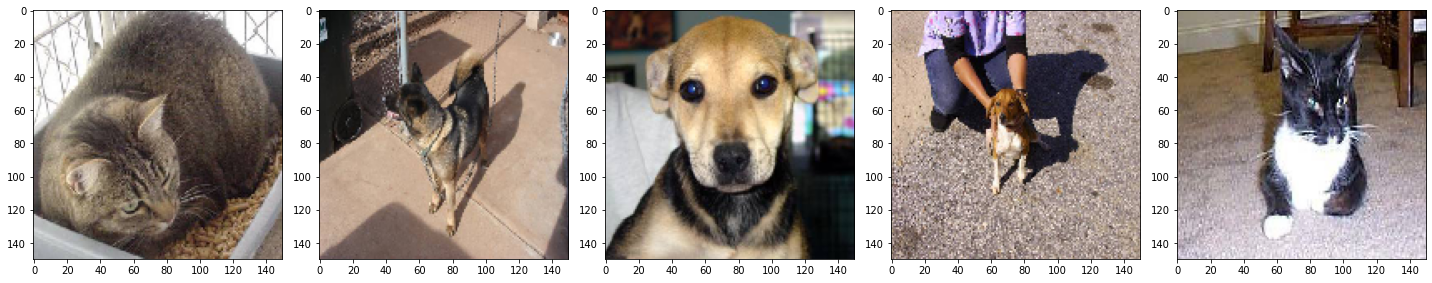

In [25]:
plot_images(sample_image[:5])

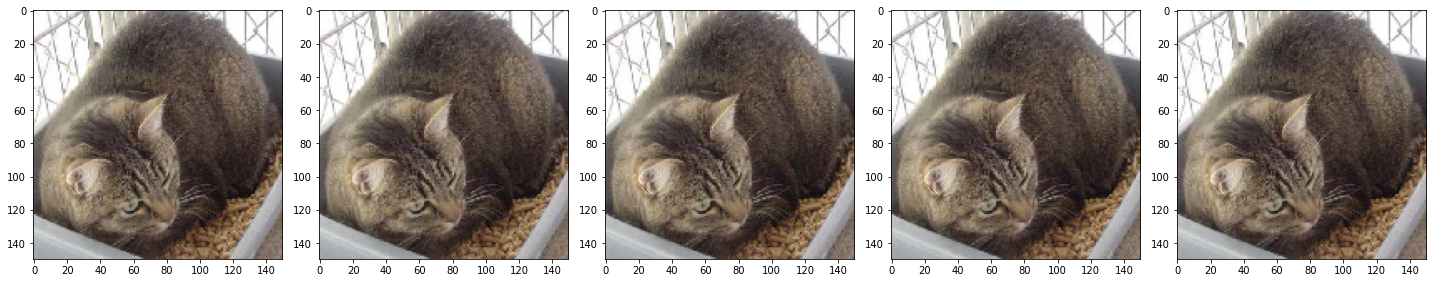

In [28]:
augmented_images = [tmp_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

## **2. Rotating Image**

In [29]:
rotate_image_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45)

In [30]:
rotate_data_gen = rotate_image_gen.flow_from_directory(directory=train_dir,
                                                       target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                       batch_size=BATCH_SIZE,
                                                       shuffle=True)

Found 2000 images belonging to 2 classes.


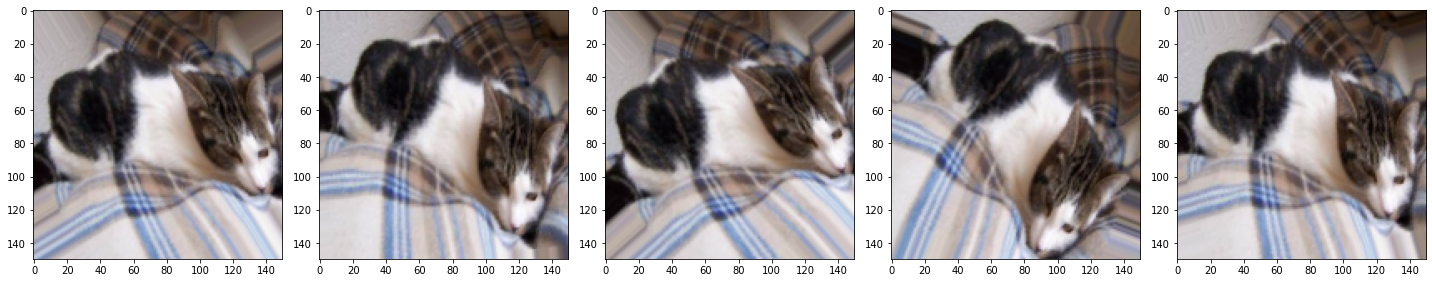

In [31]:
rotate_augmented_images = [rotate_data_gen[0][0][0] for i in range(5)]
plot_images(rotate_augmented_images)

## **3. Zooming Image**

In [32]:
zoom_image_gen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.5)

In [33]:
zoom_data_gen = zoom_image_gen.flow_from_directory(directory=train_dir,
                                                   target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                   batch_size=BATCH_SIZE,
                                                   shuffle=True)

Found 2000 images belonging to 2 classes.


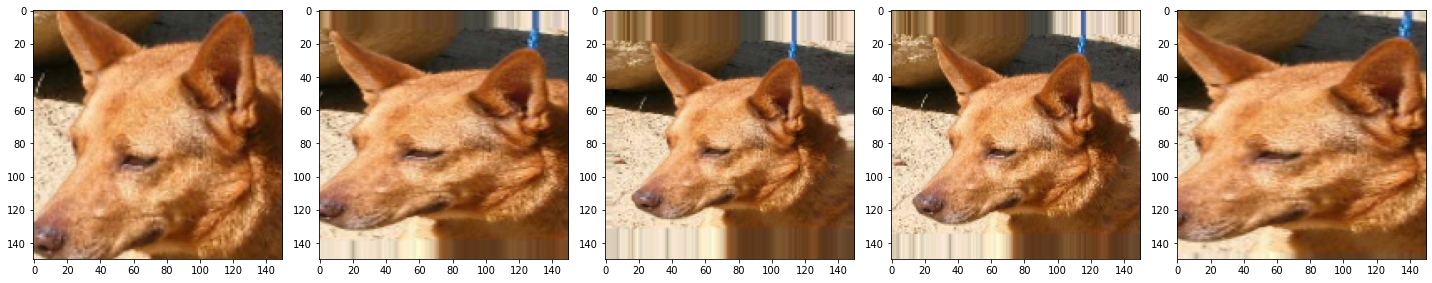

In [34]:
zoom_augmented_images = [zoom_data_gen[0][0][0] for i in range(5)]
plot_images(zoom_augmented_images)

## **Combine All Augemnation Techniques**

In [36]:
# Creating an instance of image data generator for both train and validation data

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [37]:
# Load images from directory, rescale and resize

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                           batch_size=BATCH_SIZE,
                                                           class_mode='binary',
                                                           shuffle=True)

Found 2000 images belonging to 2 classes.


In [38]:
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary',
                                                              shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


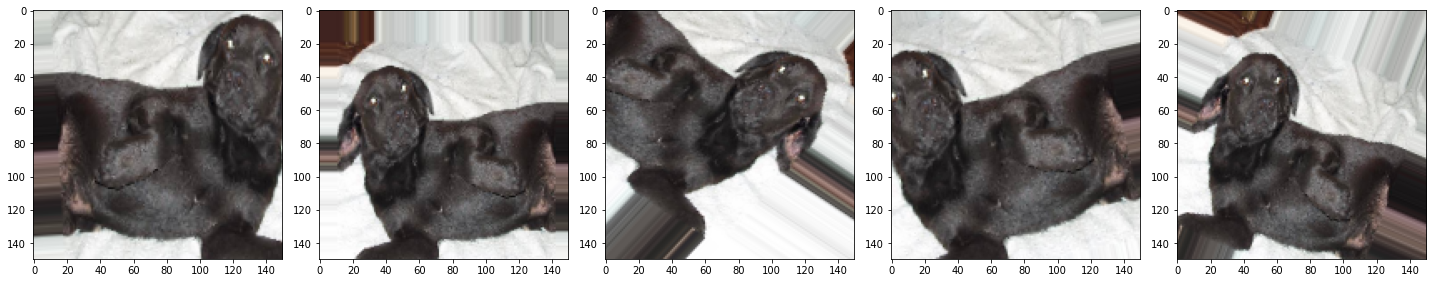

In [40]:
plot_images(augmented_images)

In [41]:
train_dir, validation_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation')

# **Visualize**

In [42]:
sample_train_images, _ = next(train_data_gen)

In [43]:
sample_train_images.shape

(100, 150, 150, 3)

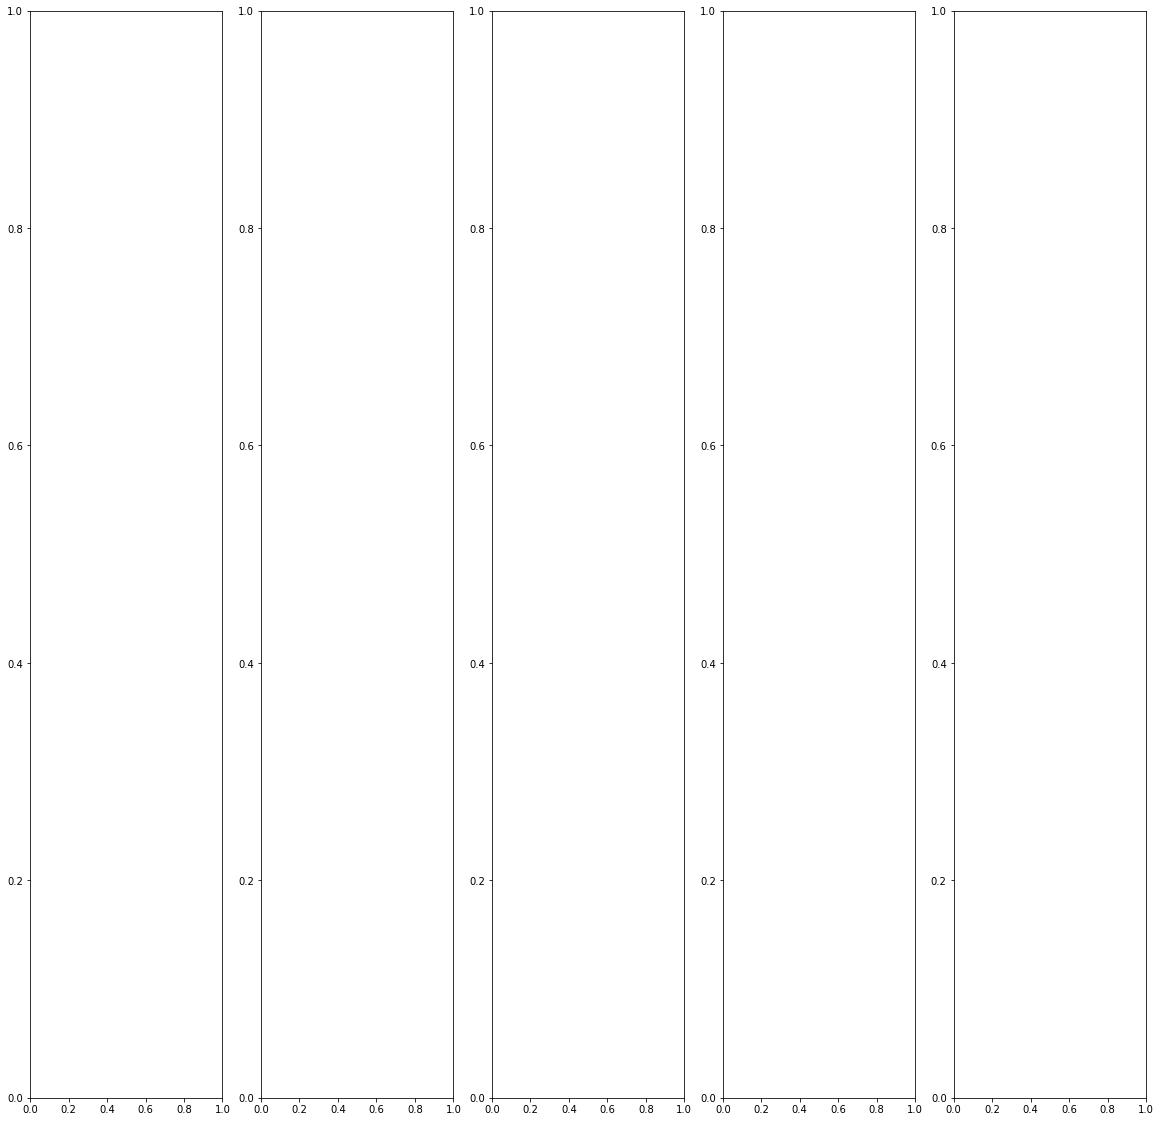

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

In [47]:
axes = axes.flatten()
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fceeb431a10>,
      dtype=object)

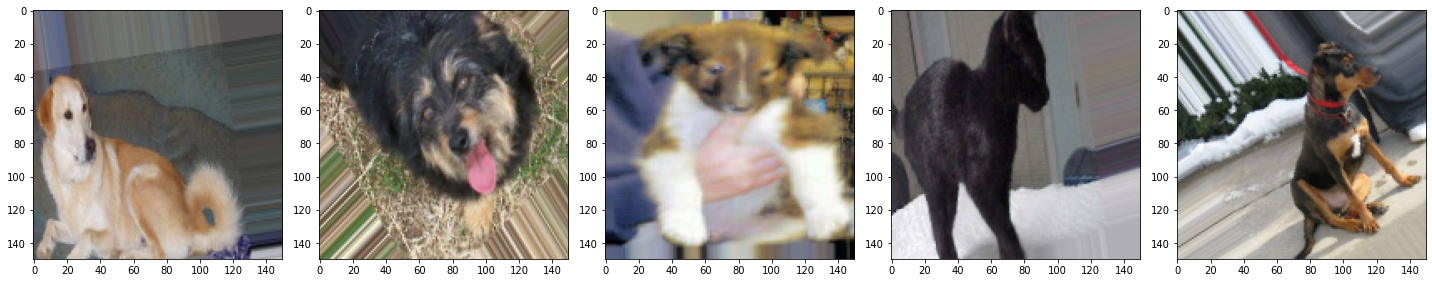

In [48]:
plot_images(sample_train_images[:5])

# **Model Creation**

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [50]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [52]:
EPOCHS = 100

In [53]:
total_train, BATCH_SIZE

(2000, 100)

In [54]:
total_train/BATCH_SIZE

20.0

In [55]:
history = model.fit(train_data_gen,
                              epochs=EPOCHS,
                              steps_per_epoch=int(np.ceil(total_train/BATCH_SIZE)),
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_validation/BATCH_SIZE)))

Epoch 1/100
20/20 [==============================] - 50s 964ms/step - loss: 0.7177 - accuracy: 0.5120 - val_loss: 0.6844 - val_accuracy: 0.5190
Epoch 2/100
20/20 [==============================] - 19s 970ms/step - loss: 0.6873 - accuracy: 0.5415 - val_loss: 0.6616 - val_accuracy: 0.5630
Epoch 3/100
20/20 [==============================] - 19s 956ms/step - loss: 0.6618 - accuracy: 0.5895 - val_loss: 0.6244 - val_accuracy: 0.6470
Epoch 4/100
20/20 [==============================] - 19s 961ms/step - loss: 0.6337 - accuracy: 0.6375 - val_loss: 0.6118 - val_accuracy: 0.6680
Epoch 5/100
20/20 [==============================] - 19s 949ms/step - loss: 0.6552 - accuracy: 0.6215 - val_loss: 0.6191 - val_accuracy: 0.6470
Epoch 6/100
20/20 [==============================] - 19s 949ms/step - loss: 0.6295 - accuracy: 0.6405 - val_loss: 0.6286 - val_accuracy: 0.6280
Epoch 7/100
20/20 [==============================] - 19s 959ms/step - loss: 0.6084 - accuracy: 0.6760 - val_loss: 0.5722 - val_accuracy:

In [56]:
loss, accuracy = model.evaluate(val_data_gen)

10/10 [==============================] - 3s 307ms/step - loss: 0.4544 - accuracy: 0.8320


# **Visualize Result**

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


In [58]:
print(acc)

[0.5120000243186951, 0.5414999723434448, 0.5895000100135803, 0.637499988079071, 0.6215000152587891, 0.640500009059906, 0.6759999990463257, 0.6549999713897705, 0.6955000162124634, 0.6855000257492065, 0.6945000290870667, 0.6890000104904175, 0.6984999775886536, 0.6955000162124634, 0.7059999704360962, 0.7210000157356262, 0.7229999899864197, 0.7294999957084656, 0.7409999966621399, 0.7294999957084656, 0.7490000128746033, 0.7444999814033508, 0.7509999871253967, 0.7049999833106995, 0.7225000262260437, 0.765999972820282, 0.7574999928474426, 0.7670000195503235, 0.7825000286102295, 0.7689999938011169, 0.7710000276565552, 0.7789999842643738, 0.7689999938011169, 0.7699999809265137, 0.765500009059906, 0.7789999842643738, 0.7864999771118164, 0.7770000100135803, 0.7774999737739563, 0.7975000143051147, 0.8029999732971191, 0.8165000081062317, 0.8140000104904175, 0.8140000104904175, 0.8090000152587891, 0.8209999799728394, 0.8289999961853027, 0.828499972820282, 0.8230000138282776, 0.8299999833106995, 0.80

In [59]:
print(val_acc)

[0.5189999938011169, 0.5630000233650208, 0.6470000147819519, 0.6679999828338623, 0.6470000147819519, 0.628000020980835, 0.6869999766349792, 0.6890000104904175, 0.6779999732971191, 0.7170000076293945, 0.7059999704360962, 0.7139999866485596, 0.734000027179718, 0.7289999723434448, 0.722000002861023, 0.7350000143051147, 0.7179999947547913, 0.7609999775886536, 0.7429999709129333, 0.7429999709129333, 0.7440000176429749, 0.7490000128746033, 0.7289999723434448, 0.6890000104904175, 0.7390000224113464, 0.7580000162124634, 0.7450000047683716, 0.7770000100135803, 0.7549999952316284, 0.7760000228881836, 0.7710000276565552, 0.7799999713897705, 0.7590000033378601, 0.7440000176429749, 0.7820000052452087, 0.765999972820282, 0.734000027179718, 0.7599999904632568, 0.7739999890327454, 0.7699999809265137, 0.7879999876022339, 0.7919999957084656, 0.7950000166893005, 0.7450000047683716, 0.7770000100135803, 0.7799999713897705, 0.8109999895095825, 0.7699999809265137, 0.7429999709129333, 0.7870000004768372, 0.78

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print(loss, val_loss)

[0.7177338004112244, 0.6873127222061157, 0.6617902517318726, 0.6336979269981384, 0.655189037322998, 0.6295389533042908, 0.6084038019180298, 0.5955140590667725, 0.5867527723312378, 0.5925506949424744, 0.579668402671814, 0.575641393661499, 0.5641053318977356, 0.5890810489654541, 0.5783586502075195, 0.5522101521492004, 0.5482848286628723, 0.5306839942932129, 0.518230676651001, 0.5321222543716431, 0.5192663669586182, 0.5090455412864685, 0.5117762684822083, 0.5587745904922485, 0.5405813455581665, 0.5004995465278625, 0.49042394757270813, 0.48854631185531616, 0.47204914689064026, 0.48105961084365845, 0.4689777195453644, 0.4683905243873596, 0.4736926257610321, 0.47680944204330444, 0.4844856560230255, 0.45426157116889954, 0.44881683588027954, 0.46864640712738037, 0.46180805563926697, 0.43754488229751587, 0.42086273431777954, 0.4093802273273468, 0.40801844000816345, 0.4096534252166748, 0.4090995192527771, 0.3966657221317291, 0.3886701762676239, 0.3845672011375427, 0.39849886298179626, 0.38655591

In [61]:
epochs_range = range(EPOCHS)

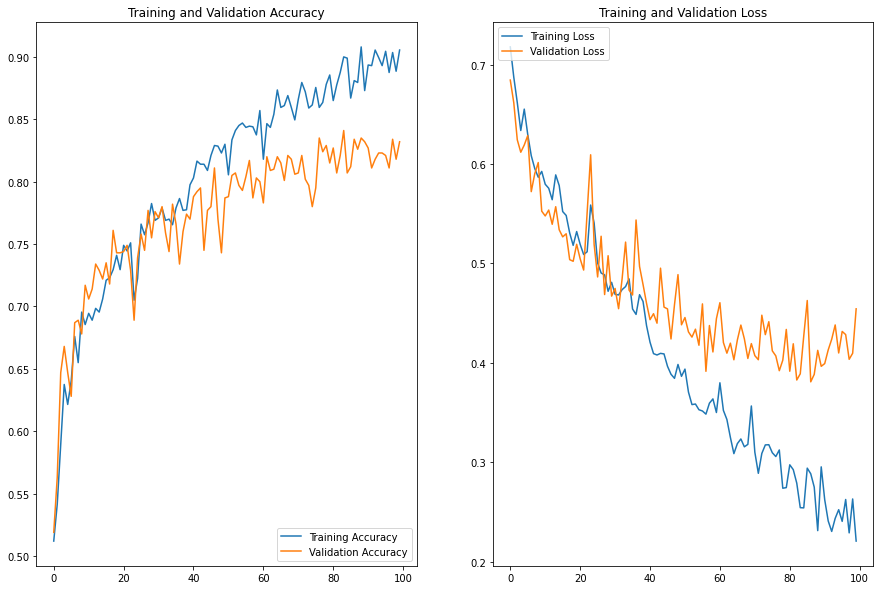

In [62]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()